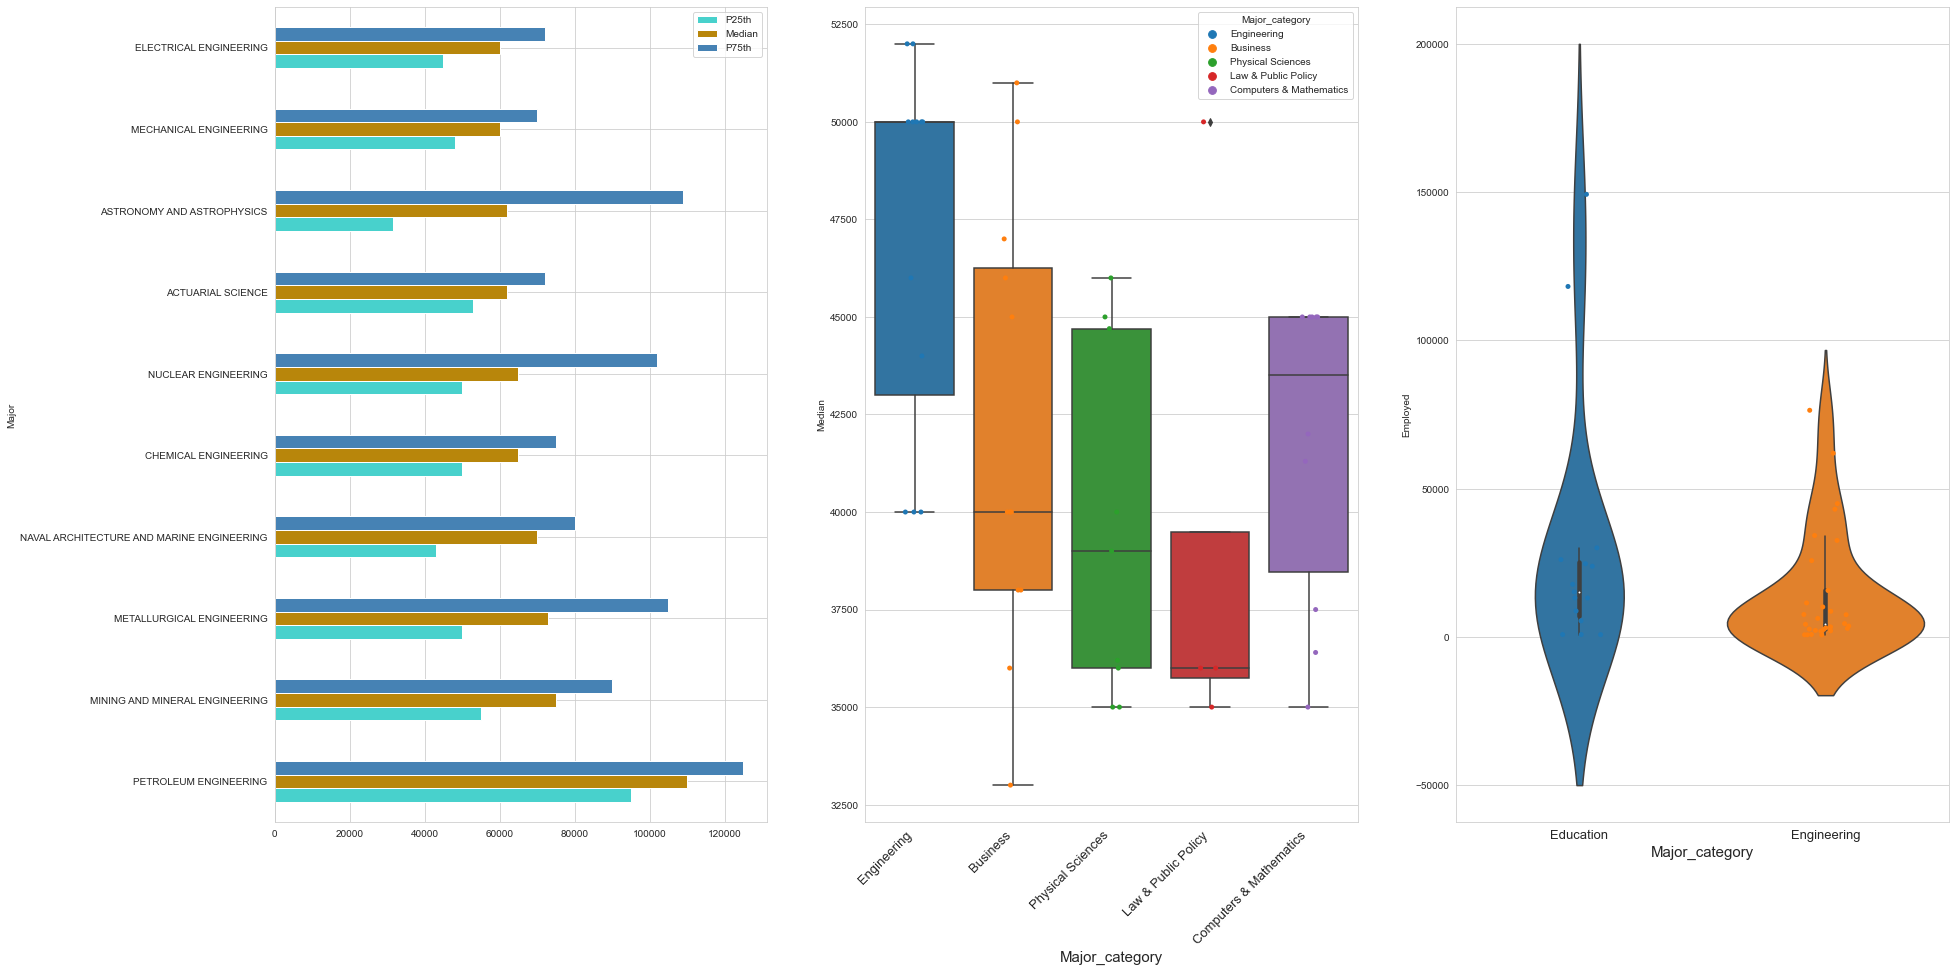

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nutil.plot import paperStyle 
download_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
a = pd.read_csv(download_url)

b = pd.read_csv("new.csv")
u = 45000 + 1.5*(45000 - 40000)
l = 40000 - 1.5*(45000 - 40000)
b = b[(b['Median'] <= u) & (b['Median'] >= l)]

a3 = a.sort_values(by = ['Major_category'], ascending=True)
a3 = a3.iloc[61:105, :]

sns.set_style('whitegrid')

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(30,15))
plt.subplots_adjust(wspace=.2)

a.sort_values(by = ['Median'], ascending=False)
a.iloc[:10].plot(x="Major", y=["P25th", "Median", "P75th"], kind="barh",
                       color=('mediumturquoise','darkgoldenrod','steelblue'),ylabel="",ax = ax0)

sns.boxplot(data=b, x='Major_category', y='Median',ax = ax1)
c=sns.stripplot(x="Major_category", y="Median",data=b,hue="Major_category",ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize='13')
ax1.set_xlabel('Major_category',fontsize='15')

sns.violinplot(x='Major_category',y='Employed',data=a3,ax=ax2)
sns.stripplot(x="Major_category", y="Employed",data=a3,ax=ax2)  
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize='13')
ax2.set_xlabel('Major_category',fontsize='15')

# Use "paperStyle" to define style for publication (scientific paper, thesis, ...)
with paperStyle(font_size=8):

    # Plot histogram & boxplot together using plt.subplots()
    fig, (ax_boxplot, ax_hist) = plt.subplots(nrows=2,
                                              figsize=(6.5, 2),
                                              gridspec_kw={"height_ratios": (.2, .8)})

    sns.boxplot(df, x='Age', ax=ax_boxplot)
    sns.histplot(df, x='Age', bins=49, ax=ax_hist)

    # Remove chart borders
    sns.despine(ax=ax_boxplot, left=True, bottom=True)
    sns.despine(ax=ax_hist, trim=True)
    ax_boxplot.set_xlabel('')
    ax_boxplot.set_yticks([])
    ax_boxplot.set_xticks([])
    
    plt.savefig('files/age.svg', bbox_inches='tight')


plt.savefig('Homework4.svg', dpi=300, bbox_inches='tight')
plt.show()